<a href="https://colab.research.google.com/github/russellelliott/PythonChess/blob/main/Firefighter_Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firefighter Chess
Source video: https://www.youtube.com/watch?v=JqdnPCEvvqY

## Given Rules
In this variant, one player controls a firefighter and their firehose.

### Firefighter
- Starting position: e1
- Movement: King
- Attack: None; only firehose can capture fire.

### Firehose
- Starting position: d1
- Movement: Moves with the firefighter; it cannot move independently
- Attack: Has queen attacks. Can capture multiple fire pieces along its attack path.

### Fire
- Starting positions: a4-h5 (16 pieces along ranks 4 and 5)
- Movement: Pawn movement. 2 pieces moved per turn.
- Attack: Pawn captures. Can only be captured by firehose attack. Can be jumped over.

### Victims
- Starting positions: h1-h7 (back rank royal pieces)
- Movement: regular piece movement
- Attack: None; only firehose can capture fire.

## Goal
The game ends in any of these conditions:
- Firefighter: extinguish all the fire
- Fire: Capture ANY of the victim pieces
- Victims: Evade capture and have all pieces reach the other site of the board

The firefighter and victims are on the same team.

## Implementation
The firefighter and victims are one color, while the fire is the opposite color.

### Player count
The game could be played with 2 or 3 players.

#### 2 Players
- Player 1 controls the firefighter and their hose, and all the victim pieces.
- Player 2 controls the fire pieces.

#### 3 Players
- Player 1 controls the firefighter and their hose.
- Player 2 controls the fire pieces.
- Player 3 controls the victim pieces.

In [1]:
pip install CairoSVG

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 69 kB 3.9 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=60646e7d28fb9e3c7e276ee34eebea0cf6b0ed1911583299ad81948994a7e556
  Stored in directory: /root/.cache/pip/wheels/7a/2b/da/aec872f95d2c24105496ef149a9a576f52daf686f8f2127541
Successfully built cairocffi


In [2]:
import chess
import chess.svg
from cairosvg import svg2png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#display the board as a png on matplotlib
def displayBoard(board):
    svg = chess.svg.board(board, size=350) #make the svg
    svg2png(bytestring=svg,write_to='output.png') #convert to png
    img = mpimg.imread('output.png')
    imgplot = plt.imshow(img)
    plt.show() #show the png

## Swap capitalization in string
https://www.codegrepper.com/code-examples/python/python+reverse+upper+and+lowercase+of+string

# Main Code

RNBQKBNR/8/8/pppppppp/pppppppp/8/8/3QK3 w KQkq - 0 1
rnbqkbnr/8/8/PPPPPPPP/PPPPPPPP/8/8/3qk3 w KQkq - 0 1
Choose a side to be the firefighter and victims: w or b: w


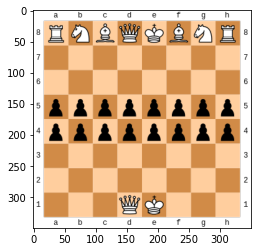

In [13]:
#custom FEN for board start
end = " w KQkq - 0 1" #end of the FEN string
startWhite = "RNBQKBNR/8/8/pppppppp/pppppppp/8/8/3QK3" #starting position in which the firefighter and victims are the white pieces
startBlack = startWhite.swapcase() #starting position in which the firefighter and victims are the black pieces.

#add the end
startWhite+=end
startBlack+=end

print(startWhite)
print(startBlack)

side = input("Choose a side to be the firefighter and victims: w or b: ")
board = chess.Board()
if side == "w":
    board = chess.Board(startWhite)
elif side == "b":
    board = chess.Board(startBlack)

displayBoard(board)